In [26]:
from torch.utils import data
import pathlib
import dataloader
import h5py
import importlib
import matplotlib.pylab as plt
import numpy as np
import matplotlib.gridspec as gridspec
import transforms
import torch
import sys
importlib.reload(dataloader)
importlib.reload(transforms)

import sampling

In [3]:
def data_ifft_transform(kspace, sampling_dist):
    kspace_us = transforms.apply_sampling(kspace, sampling_dist)
    kspace_us = transforms.to_tensor(kspace_us)
    img = transforms.ifft2(kspace_us)
    img = transforms.complex_abs(img)
    return img

In [4]:
dataset = dataloader.SliceData(
    root=pathlib.Path('/media/md/TOSHIBA EXT/MRI_Images/train_val_12_channel/Train/'),
    transform=data_ifft_transform,
    challenge='multicoil',
    sampling_dist = 'poisson'
)

[PosixPath('/media/md/TOSHIBA EXT/MRI_Images/train_val_12_channel/Train/e14507s5_P41472.7.h5'), PosixPath('/media/md/TOSHIBA EXT/MRI_Images/train_val_12_channel/Train/e14089s3_P53248.7.h5'), PosixPath('/media/md/TOSHIBA EXT/MRI_Images/train_val_12_channel/Train/e14134s3_P06656.7.h5'), PosixPath('/media/md/TOSHIBA EXT/MRI_Images/train_val_12_channel/Train/e14140s3_P52224.7.h5'), PosixPath('/media/md/TOSHIBA EXT/MRI_Images/train_val_12_channel/Train/e14141s3_P58880.7.h5'), PosixPath('/media/md/TOSHIBA EXT/MRI_Images/train_val_12_channel/Train/e14191s3_P58368.7.h5'), PosixPath('/media/md/TOSHIBA EXT/MRI_Images/train_val_12_channel/Train/e14195s3_P03584.7.h5'), PosixPath('/media/md/TOSHIBA EXT/MRI_Images/train_val_12_channel/Train/e14268s3_P26112.7.h5'), PosixPath('/media/md/TOSHIBA EXT/MRI_Images/train_val_12_channel/Train/e14292s3_P85504.7.h5'), PosixPath('/media/md/TOSHIBA EXT/MRI_Images/train_val_12_channel/Train/e14296s4_P09216.7.h5'), PosixPath('/media/md/TOSHIBA EXT/MRI_Images/train

In [5]:
# dataset.shape = (47*256,218,180,24)
len(dataset)

7332

In [36]:
npArr = dataset[25*256+125]

In [39]:
len(npArr)

2

In [31]:
sample_rec_train = npArr#np.fft.ifft2(npArr,axes = (0,1)) 

IndexError: too many indices for tensor of dimension 2

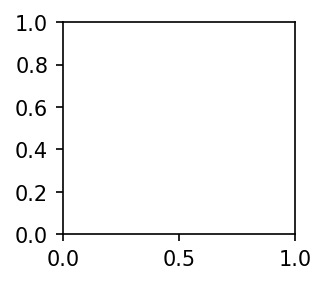

In [32]:
# Displaying channels' k-spaces
plt.figure(figsize = (8,6),dpi = 150)
gs1 = gridspec.GridSpec(3, 4)
gs1.update(wspace=0.002, hspace=0.1)

for ii in range(12):
    plt.subplot(gs1[ii])
    plt.imshow(np.abs(sample_rec_train[:,:,ii]),cmap = "gray")
    plt.axis("off")
plt.show()

In [28]:
sos = transforms.sum_of_squares(npArr)

In [30]:
sos.shape

torch.Size([218, 170])

Sum of squares


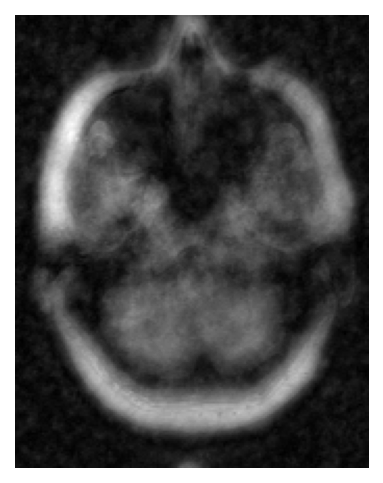

In [35]:
print("Sum of squares")
plt.figure(dpi = 150)
plt.imshow(sos,cmap = "gray")
plt.axis("off")
plt.show()

In [ ]:
npArr = npArr[:,:,::2] + 1j*npArr[:,:,1::2]

In [ ]:
plt.figure(figsize = (8,6),dpi = 150)
gs1 = gridspec.GridSpec(3, 4)
gs1.update(wspace=0.002, hspace=0.1)
for ii in range(12):
    plt.subplot(gs1[ii])
    plt.imshow(np.log(1+np.abs(npArr[:,:,ii])),cmap = "gray")
    plt.axis("off")
plt.show()

In [ ]:
pattern_shape = (218,170)
factor = 0.20
nlines = 12
radius = 13
pattern = sampling.uniform_pattern(pattern_shape,factor,center=True,dim="2D",radius_nlines=radius)
print("Uniform 2D, centre:",pattern.sum()/pattern.size)

In [ ]:
plt.figure(dpi = 300)
plt.subplot(235)
plt.imshow(pattern,cmap = "gray")
plt.axis("off")
plt.title("Uniform 2D centre",size=8)
plt.show()

In [ ]:
npArr_us = npArr.T * pattern.T

In [ ]:
npArr_us = npArr

In [ ]:
npArr_us[~pattern,:]=1

In [ ]:
npArr_us = npArr_us.T
npArr_us.shape

In [ ]:
plt.figure(figsize = (18,16),dpi = 150)
gs1 = gridspec.GridSpec(3, 4)
gs1.update(wspace=0.002, hspace=0.1)
for ii in range(12):
    plt.subplot(gs1[ii])
    plt.imshow(np.log(1+np.abs(npArr_us[:,:,ii])),cmap = "gray")
    plt.axis("off")
plt.show()

In [9]:
print("Channel-wise images")    
sample_rec_train = np.fft.ifft2(npArr_us,axes = (0,1)) # Only ky and kz are in k-space domain
print(sample_rec_train.shape)
# Displaying channels' images
plt.figure(figsize = (8,6),dpi = 150)
gs1 = gridspec.GridSpec(3, 4)
gs1.update(wspace=0.002, hspace=0.1)

for ii in range(12):
    plt.subplot(gs1[ii])
    plt.imshow(np.abs(sample_rec_train[:,:,ii]),cmap = "gray")
    plt.axis("off")
plt.show()


Channel-wise images


NameError: name 'npArr_us' is not defined

In [1]:
npArr_us

NameError: name 'npArr_us' is not defined